## Questionário 31 (Q31)

Orientações: 

- Registre suas respostas no questionário de mesmo nome no SIGAA.
- O tempo de registro das respostas no questionário será de 10 minutos. Portanto, resolva primeiro as questões e depois registre-as.
- Haverá apenas 1 (uma) tentativa de resposta.
- Submeta seu arquivo-fonte (utilizado para resolver as questões) em formato _.ipynb_ pelo SIGAA anexando-o à Tarefa denominada "Envio de arquivo" correspondente ao questionário.

*Nota:* o arquivo-fonte será utilizado apenas como prova de execução da tarefa. Nenhuma avaliação será feita quanto ao estilo de programação.

<hr>

**Questão 1.** Assinale a alternativa cujos tipos de dado mencionados podem ser todos utilizados para construir uma _Series_ do `pandas`.

A. `str`, `numpy.array`, `set`.

B. `set`, `list`, `tuple`.
 
C. `numpy.array`, `set`, `float`.

**D. `dict`, `numpy.array`, `complex`.**



<div class="alert alert-block alert-success">
<b>Resposta:</b> D. dict, numpy.array, complex.
</div>

In [12]:
import pandas as pd
import numpy as np

string = 'abc' #Pode
np_arr = np.array([1,2,3]) #Pode
um_set = {1,2,3} # N pode
tupla  = (1,2,3) # Pode
floatt = 2.3434  # Pode
comple = 2j # Pode

elementos = [string, np_arr, um_set, tupla, floatt, comple]

for datatype in elementos:
    try:
        x = pd.Series(datatype)
    except:
        print(f"{type(datatype)} Não pode ser utilizado para criar um Series")

<class 'set'> Não pode ser utilizado para criar um Series


**Questão 2** Ao se construir um objeto `pandas.Series`, um comportamento padrão é esperado quando índices não são explicitamente fornecidos. Semelhantemente, ao se trabalhar com objetos `pandas.DataFrame`, a biblioteca encarrega-se, por padrão, de tratar dados chamados "ausentes".  Assinale a alternativa correta quanto à execução das funções de criação dos objetos.

A. `pandas.Series()` sempre retorna erro se um `index` não for especificado; `pandas.DataFrame` trata dados ausentes adicionando 0 nas posições devidas e converte o `dtype` de todas as `Series` que o constituem para `int64`. 

B. `pandas.Series()` atribui valores de `1` a `n` (sendo `n` o número de elementos) às linhas; `pandas.DataFrame()` trata dados ausentes adicionando `np.nan` nas posições devidas.

**C. `pandas.Series()` atribui valores de `0` a `n` (sendo `n` o número de elementos) às linhas; `pandas.DataFrame()` trata dados ausentes adicionando `np.nan` nas posições devidas.**

D. n.d.a.

<div class="alert alert-block alert-success">
<b>Resposta:</b> C. pandas.Series() atribui valores de 0 a n (sendo n o número de elementos) às linhas; pandas.DataFrame() trata dados ausentes adicionando np.nan nas posições devidas.
</div>

In [36]:
x = pd.Series([1,2,None,4])
print(x.keys())

RangeIndex(start=0, stop=4, step=1)


In [37]:
df = pd.DataFrame(x)
df.iloc[2]

0   NaN
Name: 2, dtype: float64

**Questão 3.** A temperatura na Elysium Planitia do Planeta Vermelho é monitorada pela NASA através da MARS InSigth Mission. 
Suponha que você assinou um contrato com a NASA para analisar supostas predições climáticas para o ano de 2022. O gráfico abaixo mostra uma distribuição provável da temperatura média diária na região supracitada para cada dia do mês de junho (disponível no arquivo [mars-temp-2022-06.csv](https://github.com/gcpeixoto/ICD/blob/main/database/mars-temp-2022-06.csv?raw=true)), porém, falhas de medição passadas induziram _gaps_ nas previsões para alguns dias, como pode ser observado.

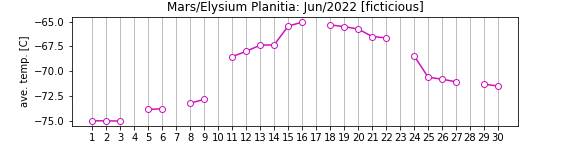

Fonte: adaptado de [NASA MARS Insight Mission](https://mars.nasa.gov/insight/weather/)


Sabendo que a temperatura $T_d$ no dia desconhecido $d$ pode ser estimada por

$$T_d = \mu(T_{d-1},T_{d-2},T_{d-3}),$$

onde $\mu$ significa "média aritmética dos valores dados", assinale a alternativa que corresponde à temperatura média para todo o mês de junho, à menor e à maior, nesta ordem.

A. (-72.15, -74.99, -65.07)

B. (-65.0, -72.99, -65.07)

C. (-75.0, -74.99, -65.07)

**D. (-69.97, -74.99, -65.07)**


**Obs.:** se $d=25$, a temperatura no 25o. dia é a média das temperaturas do 22o. ao 24o. dia.

<div class="alert alert-block alert-success">
<b>Resposta:</b> D. (-69.97, -74.99, -65.07)
</div>

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/gcpeixoto/ICD/main/database/mars-temp-2022-06.csv")
df.rename(columns={'Unnamed: 0': 'dia'}, inplace=True)

In [4]:
df.at[3,'temp']

nan

In [104]:
def temp_mars(dia):
    return (df.at[dia-1, 'temp'] + df.at[dia-2, 'temp'] + df.at[dia-3, 'temp'])/3

for i in range(len(df)):
    if pd.isna(df.at[i, 'temp']):
        df.at[i, 'temp'] = temp_mars(i)

In [105]:
print(f'''
A temperatura média para o mês de junho é: {round(df['temp'].describe()['mean'], 2)}°C
A temperatura mínima para o mês de junho é: {round(df['temp'].describe()['min'], 2)}°C
A temperatura máxima para o mês de junho é: {round(df['temp'].describe()['max'], 2)}°C
----------------------------------------------------
Resposta: ({round(df['temp'].describe()['mean'],2)}, {round(df['temp'].describe()['min'],2)}, {round(df['temp'].describe()['max'],2 )})
''')



A temperatura média para o mês de junho é: -69.97°C
A temperatura mínima para o mês de junho é: -74.99°C
A temperatura máxima para o mês de junho é: -65.07°C
----------------------------------------------------
Resposta: (-69.97, -74.99, -65.07)

